In [95]:
import librosa
import librosa.display

import numpy as np
import matplotlib.pyplot as plt

x_raw = "MiniMega_low.mp3"
y_raw = "MiniMega_norm.mp3"
x, sr_x = librosa.load(x_raw)
y, sr_y = librosa.load(y_raw)

/Users/tryu/Programs/dcgan/venv/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/Users/tryu/Programs/dcgan/venv/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


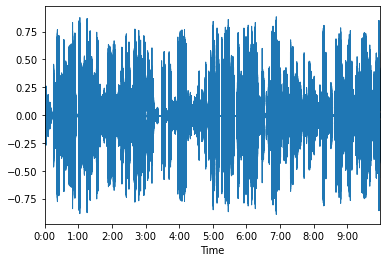

In [88]:
librosa.display.waveplot(x, sr=sr_x)

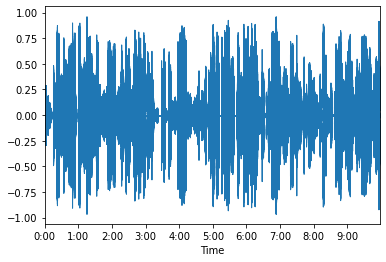

In [89]:
librosa.display.waveplot(y, sr=sr_y)

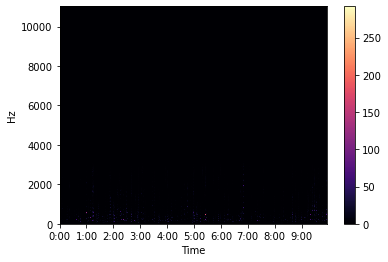

In [96]:
D = np.abs(librosa.stft(x))
librosa.display.specshow(D, sr=sr_x, x_axis='time', y_axis='linear');
plt.colorbar();

In [99]:
# x_inv = librosa.griffinlim(D)
reconstructed_audio = librosa.griffinlim(D)

In [100]:
import soundfile
soundfile.write('test.wav', reconstructed_audio, 22050)

In [56]:
sr_x

22050

In [79]:
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from scipy.fftpack import fft
import numpy as np
rate, data = read(x_raw)
fft_out = fft(data)

In [77]:
import pydub

In [78]:
def read(f, normalized=False):
    """MP3 to numpy array"""
    a = pydub.AudioSegment.from_mp3(f)
    y = np.array(a.get_array_of_samples())
    if a.channels == 2:
        y = y.reshape((-1, 2))
    if normalized:
        return a.frame_rate, np.float32(y) / 2**15
    else:
        return a.frame_rate, y

def write(f, sr, x, normalized=False):
    """numpy array to MP3"""
    channels = 2 if (x.ndim == 2 and x.shape[1] == 2) else 1
    if normalized:  # normalized array - each item should be a float in [-1, 1)
        y = np.int16(x * 2 ** 15)
    else:
        y = np.int16(x)
    song = pydub.AudioSegment(y.tobytes(), frame_rate=sr, sample_width=2, channels=channels)
    song.export(f, format="mp3", bitrate="320k")

In [84]:
fft_out.shape

(28694273,)

In [85]:
from scipy import signal

In [86]:
f, t, Sxx = signal.spectrogram(fft_out, 10e3)

/Users/tryu/Programs/dcgan/venv/lib/python3.7/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


/Users/tryu/Programs/dcgan/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """Entry point for launching an IPython kernel.


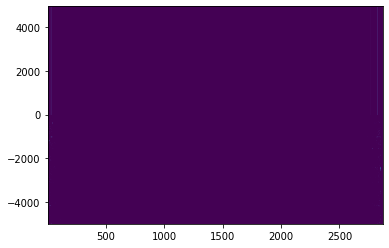

In [87]:
plt.pcolormesh(t, f, Sxx)